# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [57]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [58]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [59]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [60]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


Both **azidas** and **feat_info** files were uploaded into the DataFrames successfully

In [61]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

#checking the structure of Azdias df
azdias.sample(5)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
693827,-1,3,1,3.0,4,2,3,1,3,2,...,1.0,2.0,3.0,2.0,5.0,3.0,2.0,4.0,9.0,3.0
351829,2,4,2,2.0,4,2,4,3,3,1,...,2.0,1.0,0.0,0.0,1.0,2.0,4.0,2.0,3.0,1.0
554157,-1,1,1,4.0,2,5,1,4,3,4,...,1.0,3.0,3.0,1.0,5.0,3.0,2.0,4.0,7.0,3.0
568846,-1,4,2,6.0,4,1,5,1,1,4,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,9.0,4.0
320600,2,3,1,3.0,3,1,5,1,1,5,...,1.0,4.0,3.0,1.0,3.0,3.0,2.0,3.0,9.0,4.0


In [62]:
azdias.shape

(891221, 85)

**azidas** has over 891k rows (records), each having 85 columns (features)

In [63]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

Almost all of the 85 features are numerical (float or int). 

There are just a handful (4) features which are type *string*

In [64]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [65]:
azdias['CAMEO_DEUG_2015'].sample(5)

100331    NaN
423799      9
499353      2
333688      8
286156      2
Name: CAMEO_DEUG_2015, dtype: object

In [66]:
azdias['CAMEO_DEU_2015'].sample(5)

543447    8A
42643     3D
73439     9B
75103     4C
301597    4C
Name: CAMEO_DEU_2015, dtype: object

In [67]:
type(azdias['OST_WEST_KZ'][1])

str

In [68]:
#calculating the total null/missing values in the azdias dataset

azdias.isnull().sum()

AGER_TYP                     0
ALTERSKATEGORIE_GROB         0
ANREDE_KZ                    0
CJT_GESAMTTYP             4854
FINANZ_MINIMALIST            0
                         ...  
PLZ8_HHZ                116515
PLZ8_GBZ                116515
ARBEIT                   97216
ORTSGR_KLS9              97216
RELAT_AB                 97216
Length: 85, dtype: int64

There are missing values present in the most of the features columns. However, these only include the values which are 'NaN' right now. It does not include the values which are **encoded** as missing. We are going to explore the encoded missing values next.

In [69]:
#exploring feat_info

feat_info.sample(5)

,attribute,information_level,type,missing_or_unknown
10,FINANZTYP,person,categorical,[-1]
36,SEMIO_PFLICHT,person,ordinal,"[-1,9]"
66,BALLRAUM,postcode,ordinal,[-1]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
44,ANZ_PERSONEN,household,numeric,[]


The **feat_info** table includes summarized info about the feature columns of azidas table. It describes the information level and the variable type each column has. *More importantly* it includes codes that are used to encide the **missing/unknown** values in the table. We are going to use these codes to examine the true extent of missing information in each feature/column

In [70]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


There are **no missing** values in the *feat_info* table 

In [71]:
feat_info.nunique()

attribute             85
information_level      9
type                   5
missing_or_unknown     9
dtype: int64

In [72]:
feat_info['information_level'].value_counts()

person            43
macrocell_plz8     8
household          7
building           7
microcell_rr3      6
region_rr1         5
postcode           3
microcell_rr4      3
community          3
Name: information_level, dtype: int64

In [73]:
feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

In [74]:
feat_info['missing_or_unknown'].value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[-1,X]       1
[-1,XX]      1
[XX]         1
[-1,0,9]     1
Name: missing_or_unknown, dtype: int64

In [75]:
feat_info.query('missing_or_unknown == "[]"')

,attribute,information_level,type,missing_or_unknown
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
44,ANZ_PERSONEN,household,numeric,[]
45,ANZ_TITEL,household,numeric,[]
51,ANZ_HH_TITEL,building,numeric,[]
53,KONSUMNAEHE,building,ordinal,[]
69,GEBAEUDETYP_RASTER,region_rr1,ordinal,[]
71,MOBI_REGIO,region_rr1,ordinal,[]
72,ONLINE_AFFINITAET,region_rr1,ordinal,[]
74,KBA13_ANZAHL_PKW,macrocell_plz8,numeric,[]


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [76]:
#creating a copy of feat_info for cleaning

feat_info_clean = feat_info.copy()

We are going to remove the brackets from the *missing_or_unknown* column 

In [77]:
feat_info_clean['missing_or_unknown'] = feat_info_clean['missing_or_unknown'].str.replace('[', '')
feat_info_clean['missing_or_unknown'] = feat_info_clean['missing_or_unknown'].str.replace(']', '')

In [78]:
feat_info_clean['missing_or_unknown'].sample(5)

76      -1
43       0
60      -1
26    -1,9
16       0
Name: missing_or_unknown, dtype: object

Identifying missing or unknown data values and convert them to NaNs.

In [79]:
#creating a dict to be used to substitute the missing values encoding with NaN in the azidas table

missing_code_dict = {}
for i in feat_info_clean.index:
    missing_code = []
    for val in feat_info_clean.iloc[i]['missing_or_unknown'].split(','):
        try:
            missing_code.append(int(val))
        except:
            missing_code.append(val)
    
    missing_code_dict[feat_info_clean.iloc[i]['attribute']] = missing_code

In [80]:
#creating a copy of the azidas table for cleaning

azidas_clean = azdias.copy()

In [81]:
#using the missing_code_dict to replace missing values encoding with 'NaN' in the azidas_clean df

for col in missing_code_dict.keys():
    for val in missing_code_dict[col]:
        azidas_clean[col] = azidas_clean[col].replace(val, np.nan)    

In [82]:
#total missing values BEFORE indentification and conversion

azdias.isna().sum().sum()

4896838

In [83]:
#total missing values AFTER indentification and conversion

azidas_clean.isna().sum().sum()

8373929

We can observe that there were almost twice as many missing values in the table as initially estimated



#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [84]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

In [85]:
#creating a barchart to display the number of missing values per column

na_counts_col = azidas_clean.isna().sum().sort_values(ascending = False)

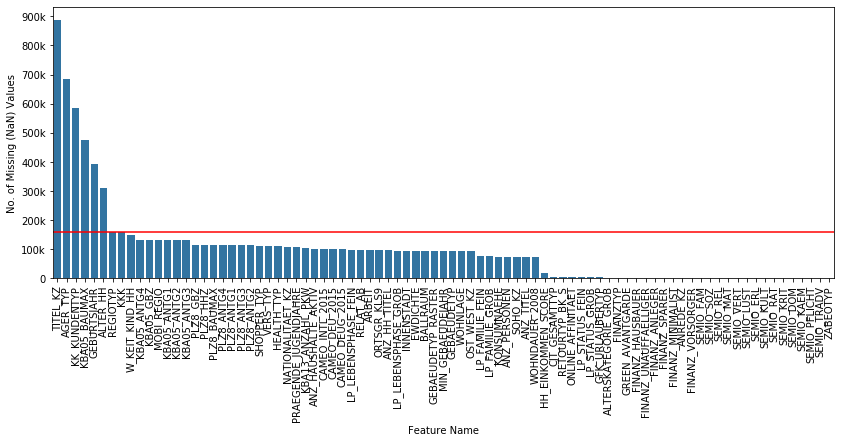

In [86]:
plt.figure(figsize = [14,5])

sns.barplot(na_counts_col.index.values, na_counts_col, color = sns.color_palette()[0])

plt.xlabel('Feature Name')
plt.ylabel('No. of Missing (NaN) Values')

plt.yticks(np.arange(0, 900001, 100000), ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k'])
plt.xticks(rotation = 90)

plt.axhline(y = 160000, color = 'red');

In [87]:
#finding the outlier columns/features i.e. features with extraordinary amount of NaN values

outlier_cols = []

for i in range(len(na_counts_col)):
    if na_counts_col.values[i] > 160000:
        outlier_cols.append(na_counts_col.index[i])

outlier_cols

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH']

In [88]:
feat_info_clean.query('attribute in @outlier_cols')

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"-1,0"
11,GEBURTSJAHR,person,numeric,0
40,TITEL_KZ,person,categorical,"-1,0"
43,ALTER_HH,household,interval,0
47,KK_KUNDENTYP,household,categorical,-1
64,KBA05_BAUMAX,microcell_rr3,mixed,"-1,0"


There are __6__ outlier columns having **more than 160,000 missing (NaN) values**. Three of these features contrain information about the *person*, two contain information about the *household* and one contains information about the *microcell_rr3* to which the user belongs to.

For the analysis, we will remove these features/columns from our dataset

In [89]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)


#removing the outlier columns
azidas_clean.drop(outlier_cols, axis = 1, inplace = True)

In [90]:
# Investigate patterns in the amount of missing data in each column.
na_counts_col.value_counts()

0         24
116515     7
4854       6
133324     6
93148      4
73499      4
93740      3
111196     3
99352      3
97375      2
77792      2
158064     2
99611      1
108315     1
147988     1
2881       1
685843     1
108164     1
584612     1
392318     1
94572      1
18348      1
105800     1
310267     1
97632      1
93155      1
889061     1
476524     1
73969      1
97274      1
97008      1
dtype: int64

The remaining columns/features have **less than 18% ( i.e. less than 160,000) missing values** in them. 

- 24 columns/features have no missing information
- 7 columns/features have 116,515 values missing
- 6 columns/features have 133,324 values missing

It will be worthwhile to explore the missing values in each column again once we filter out the records having very little information.

In [91]:
na_counts_col

TITEL_KZ         889061
AGER_TYP         685843
KK_KUNDENTYP     584612
KBA05_BAUMAX     476524
GEBURTSJAHR      392318
                  ...  
SEMIO_DOM             0
SEMIO_KAEM            0
SEMIO_PFLICHT         0
SEMIO_TRADV           0
ZABEOTYP              0
Length: 85, dtype: int64

In [92]:
#REGIOTYP has over 158k missing values

azidas_clean[azidas_clean['REGIOTYP'].isna()].sample(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
249417,3.0,2,2.0,3,2,3,4,2,3,6,...,2.0,2.0,2.0,2.0,4.0,5.0,4.0,4.0,6.0,3.0
258233,1.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565253,2.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452785,3.0,2,2.0,4,2,4,4,3,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889896,2.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that some records which have a missing value for *REGIOTYP* also have missing values for many other features/columns

In [93]:
#ALTERSKATEGORIE_GROB has the least number of missing values (2,881) among the columns having a missing value 

azidas_clean[azidas_clean['ALTERSKATEGORIE_GROB'].isna()].sample(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
115668,NaN,2,4.0,2,3,2,3,5,3,1,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,3.0,4.0,5.0
715133,NaN,1,1.0,4,2,4,3,2,2,6,...,3.0,2.0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0
23261,NaN,1,6.0,3,3,4,3,3,3,6,...,3.0,3.0,2.0,1.0,1.0,5.0,5.0,4.0,8.0,3.0
475278,NaN,1,4.0,3,4,1,3,5,2,4,...,2.0,3.0,2.0,1.0,1.0,4.0,3.0,3.0,5.0,5.0
27897,NaN,2,3.0,1,5,3,5,4,5,1,...,3.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,3.0


Unlike for features having a large number of missing values, it can be seen that records which have a missing value for *ALTERSKATEGORIE_GROB* have very little missing information for other features

In [94]:
#GFK_URLAUBERTYP has only 4,854 missing values

azidas_clean[azidas_clean['GFK_URLAUBERTYP'].isna()].sample(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
693882,4.0,1,NaN,5,1,5,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
32253,3.0,2,NaN,4,1,5,1,1,3,2,...,2.0,3.0,2.0,0.0,1.0,4.0,4.0,4.0,7.0,3.0
116298,1.0,1,NaN,4,1,5,2,1,4,6,...,4.0,1.0,1.0,0.0,1.0,2.0,3.0,3.0,1.0,3.0
656449,4.0,1,NaN,3,1,5,1,1,5,6,...,2.0,3.0,2.0,1.0,1.0,5.0,3.0,3.0,6.0,2.0
384884,4.0,2,NaN,2,1,5,3,1,5,6,...,1.0,3.0,3.0,2.0,5.0,3.0,2.0,3.0,7.0,2.0


Again it can be seen that records having a missing value for *GFK_URLAUBERTYP* have very little missing information for other features

#### Discussion 1.1.2: Assess Missing Data in Each Column

- Generally the columns had less than 18% or 160,000 values missing. 

- There were 6 features/columns, however, which had a large number of missing values i.e. > 300k missing values. These columns were:
    - 3 of these columns had information about the person
    - 2 of these columns had information about the household
    - 1 of these columns had information about the microcell


- It was noticed that some columns had relatively larger number of missing values (>100k). Records having a missing value for these features generally had missing values for other features as well
- Overall it was noticed that there were records which had missing values for multiple features/columns


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [95]:
# How much data is missing in each row of the dataset?

In [96]:
#counting the number of missing values per record/row

na_counts_rows = azidas_clean.isna().sum(axis = 1).sort_values()

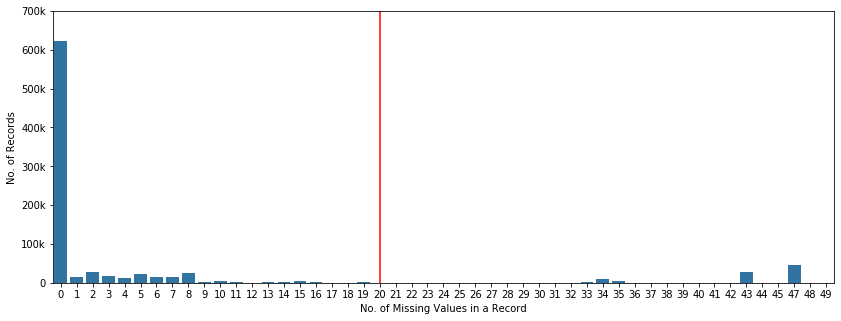

In [97]:
#plotting the number of missing values per record/row freq for better understaing

plt.figure(figsize = [14,5])

sns.countplot(na_counts_rows, color = sns.color_palette()[0])

plt.xlabel('No. of Missing Values in a Record')
plt.ylabel('No. of Records')

plt.yticks(np.arange(0, 700001, 100000), ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k'])
#plt.xticks(rotation = 90)

plt.axvline(x = 20, color = 'red');

We are going to use a *threshold* of **20 missing** values to divide the dataset into two parts
- Records/rows having **less than 20 missing feature/column values** will be placed into **azdias_low_nan** DataFrame
- Records/rows having **more than 20 missing feature/column values** will be placed into **azdias_high_nan** DataFrame

*The threshold of 20 missing values was chosen as it equals 1/4 (25%) of the remaining features in the dataset*

In [98]:
# Write code to divide the data into two subsets based on the number of missing values in each row.

In [99]:
#separating the indexes for records with high NaN from records having low NaN

high_missing_data = []
low_missing_data = []

for i in range(len(na_counts_rows)):
    if na_counts_rows.values[i] >= 20:
        high_missing_data.append(na_counts_rows.index[i])
    else:
        low_missing_data.append(na_counts_rows.index[i])

In [100]:
#checking if all the records were sorted in the two categories

len(na_counts_rows) == (len(high_missing_data) + len(low_missing_data))

True

In [101]:
#creating separate DataFrames for records with high NaNs vs records with low NaNs

azdias_high_nan = azidas_clean[azidas_clean.index.isin(high_missing_data)]
azdias_low_nan = azidas_clean[azidas_clean.index.isin(low_missing_data)]

In [102]:
azdias_high_nan.sample(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
52769,3.0,1,3.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482762,3.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297311,1.0,2,6.0,2,5,3,5,5,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313631,1.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309464,1.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
azdias_low_nan.sample(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
665330,4.0,2,1.0,4,1,5,2,2,2,2,...,3.0,1.0,0.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0
653853,1.0,2,6.0,2,5,2,5,5,2,1,...,3.0,3.0,2.0,0.0,1.0,4.0,4.0,3.0,9.0,5.0
593466,3.0,2,2.0,3,1,5,1,2,5,5,...,2.0,4.0,2.0,1.0,2.0,4.0,4.0,3.0,5.0,4.0
378422,4.0,1,3.0,5,1,5,1,1,2,5,...,4.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,3.0
715195,4.0,1,4.0,5,2,4,4,2,1,6,...,3.0,3.0,0.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0


In [104]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

In [105]:
#defining a function that compares the feature distribution of records 
#having low vol of missing data with records having high vol of missing data

def plot_comparison(feature):
    
    plt.figure(figsize=[12,5])

    plt.subplot(1,2,1)

    sns.countplot(azdias_low_nan[feature], color = sns.color_palette()[0])
    plt.title('Low Missing (NaN) Values');


    plt.subplot(1,2,2)

    sns.countplot(azdias_high_nan[feature], color = sns.color_palette()[0])
    plt.title('High Missing (NaN) Values');


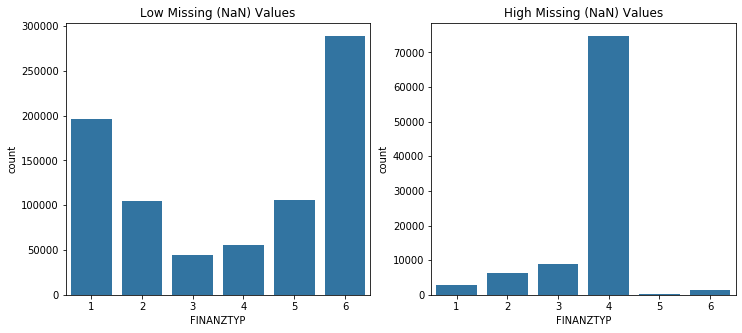

In [106]:
plot_comparison('FINANZTYP')

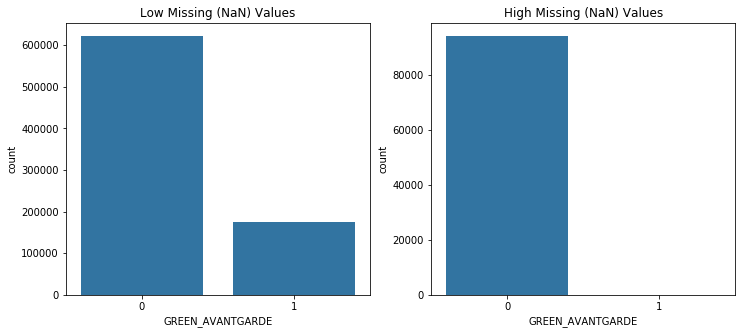

In [107]:
plot_comparison('GREEN_AVANTGARDE')

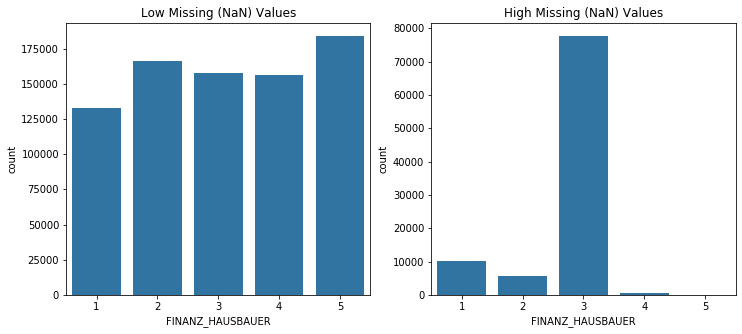

In [108]:
plot_comparison('FINANZ_HAUSBAUER')

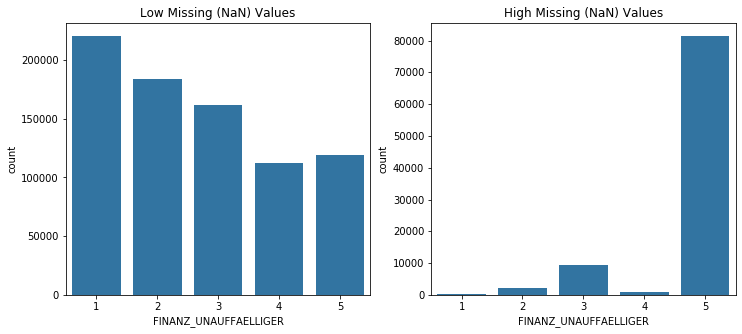

In [109]:
plot_comparison('FINANZ_UNAUFFAELLIGER')

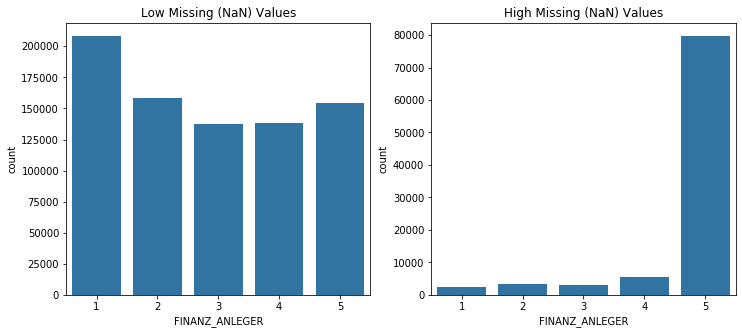

In [110]:
plot_comparison('FINANZ_ANLEGER')

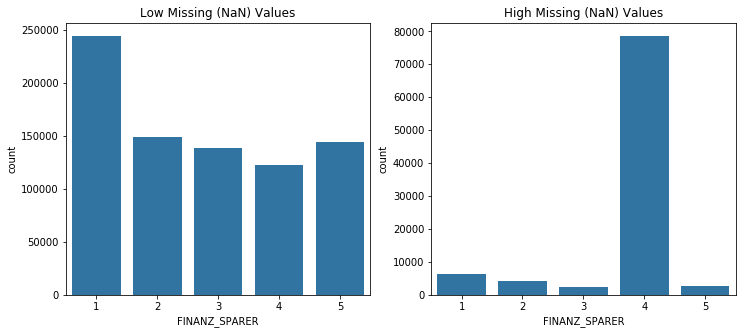

In [111]:
plot_comparison('FINANZ_SPARER')

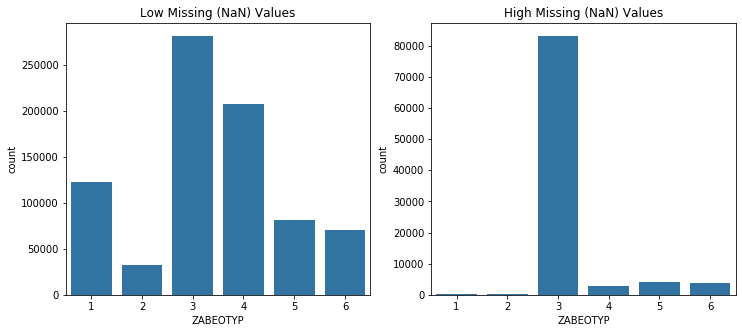

In [112]:
plot_comparison('ZABEOTYP')

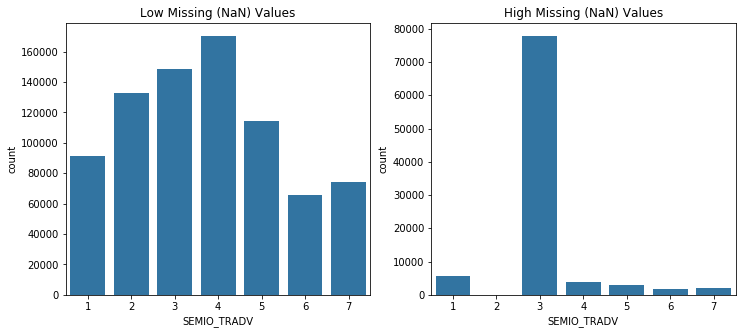

In [113]:
plot_comparison('SEMIO_TRADV')

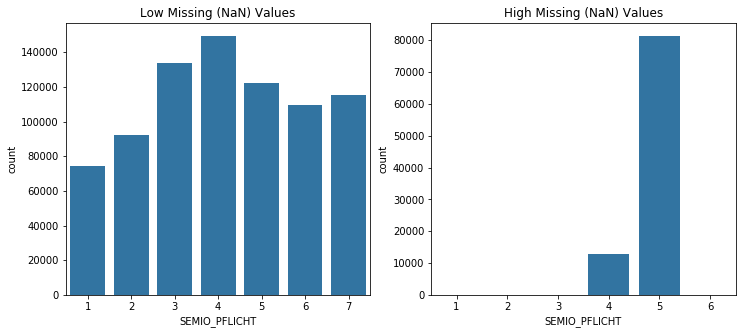

In [114]:
plot_comparison('SEMIO_PFLICHT')

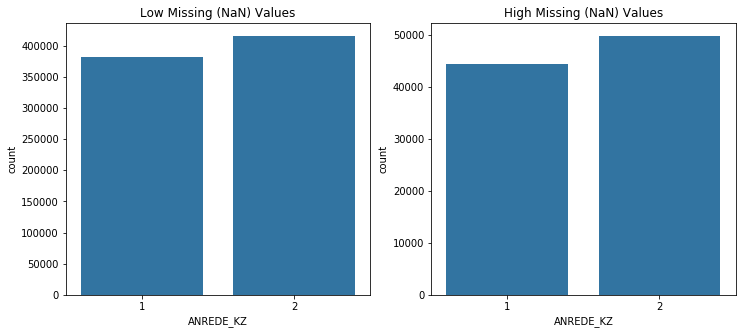

In [115]:
plot_comparison('ANREDE_KZ')

#### Discussion 1.1.3: Assess Missing Data in Each Row

- Majority of records (over 600k) have no missing values for any feature/column. 
- However, there are some records (95k) which have more than 25% data missing. 
- We compared the data distribution of 10 features for records with low missing data vs records with high missing data
- It was observed that for most of the features, the data distribution in records with low missing data was **not similar** to the data distribution in records with high missing data
- As the data distribution between the two sets of records was *different*, we cannot simply drop these points from the analysis as it would lead to a big loss of information. We will have to make a note on these data points as **special**



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [116]:
# How many features are there of each data type?

feat_info['type'].value_counts()


ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

**Reminder**:
- The features of the following data types will be **kept as is**:
    - Ordinal (*49 features*) - assumption made that these are interval in nature i.e. have linear spacing between them
    - Numeric (*7 features*)
    - Interval (*1 features*)


- This leaves us with the following two data types of features which **require our attention**:
    - Categorical (*21 features*)
    - Mixed (*7 features*)



#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [117]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

In [118]:
feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


Most of the categorical variables store information about the *person*. A few store information about *household*, *building*, and the *microcell_rr4*

We will go one by one through the list of 21 categorical features and sort them and see which are binary and which are multi-level and which might need one-hot-encoding

Before we start the exercise, we will run a check to see if any of these categorical features were included in the list of **outlier_cols** which we had deleted from the dataset

In [119]:
categorical_outlier = []

for feature in feat_info[feat_info['type'] == 'categorical']['attribute']:
    if feature in outlier_cols:
        categorical_outlier.append(feature)


In [120]:
print(len(categorical_outlier))
categorical_outlier

3


['AGER_TYP', 'TITEL_KZ', 'KK_KUNDENTYP']

There are **3** categorical features which have been removed from the dataset as they were judged to be *outlier* due to the high number of missing values in them

We will now assess the individual data types of every categorical feature/column

In [121]:
#creating a df of every categorical feature and its corresponding values - this will help us sort the features better

categorical_list = []

for feature in feat_info[feat_info['type'] == 'categorical']['attribute']:
    if feature not in categorical_outlier:
        categorical_list.append({'feature': feature,
                                'values': azidas_clean[feature].unique()})
        

df_categorical = pd.DataFrame(categorical_list, columns = ['feature', 'values'])

In [122]:
df_categorical

,feature,values
0,ANREDE_KZ,"[1, 2]"
1,CJT_GESAMTTYP,"[2.0, 5.0, 3.0, 4.0, 1.0, 6.0, nan]"
2,FINANZTYP,"[4, 1, 6, 5, 2, 3]"
3,GFK_URLAUBERTYP,"[10.0, 1.0, 5.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4...."
4,GREEN_AVANTGARDE,"[0, 1]"
5,LP_FAMILIE_FEIN,"[2.0, 5.0, 1.0, nan, 10.0, 7.0, 11.0, 3.0, 8.0..."
6,LP_FAMILIE_GROB,"[2.0, 3.0, 1.0, nan, 5.0, 4.0]"
7,LP_STATUS_FEIN,"[1.0, 2.0, 3.0, 9.0, 4.0, 10.0, 5.0, 8.0, 6.0,..."
8,LP_STATUS_GROB,"[1.0, 2.0, 4.0, 5.0, 3.0, nan]"
9,NATIONALITAET_KZ,"[nan, 1.0, 3.0, 2.0]"


There are **four** binary (two-level) categorical features that take numeric values. We will keep them as-is

1. ANREDE_KZ [1, 2]
2. GREEN_AVANTGARDE [0, 1]
3. SOHO_KZ [0.0, 1.0]
4. VERS_TYP [1.0, 2.0]


There is **one** binary variable that takes on non-numeric values. We will *re-encode the values as numbers* using lavel encoding

1. OST_WEST_KZ [W, O]

There are **thirteen** multi-level categoricals (three or more values). We will *encode* these values using multiple dummy variables (one-hot-encoding)

1. CJT_GESAMTTYP
2. FINANZTYP
3. GFK_URLAUBERTYP
4. LP_FAMILIE_FEIN
5. LP_FAMILIE_GROB
6. LP_STATUS_FEIN
7. LP_STATUS_GROB
8. NATIONALITAET_KZ
9. SHOPPER_TYP
10. ZABEOTYP
11. GEBAEUDETYP
12. CAMEO_DEUG_2015
13. CAMEO_DEU_2015

In [123]:
# Re-encode categorical variable(s) to be kept in the analysis.

In [124]:
#defining function to encode the values of OST_WEST_KZ
#'W' will be encoded as 1 and 'O' will be encoded as 0

def encoder(x):
    if x == 'W':
        x = 1
    elif x == 'O':
        x = 0
    return x

In [125]:
azidas_clean['OST_WEST_KZ'] = azidas_clean['OST_WEST_KZ'].apply(encoder)

In [126]:
#dummy encoding the other categorical variables

multi_val_cat = ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', \
                 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', \
                 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']



In [127]:
#converting all the multi value categoricals to dtype str

azidas_clean[multi_val_cat] = azidas_clean[multi_val_cat].astype(str)

In [128]:
#creating dummy variables for the multi value catergoricals

azidas_clean = azidas_clean.join(pd.get_dummies(azidas_clean[multi_val_cat]))

In [129]:
#dropping the multivalue vategoricals from the dataframe

azidas_clean.drop(multi_val_cat, axis = 1, inplace=True)

#### Discussion 1.2.1: Re-Encode Categorical Features

There were a total of **21** categorical features in the dataset. __3__ features were *dropped from the dataset as they had extremely large number of missing values*. 

The reamining **18** features consisted of 3 types:

- **numeric binary** (*4 features*) - we kept them as is
- **non-numeric binary** (*1 feature*) - we re-encoded the values as numeric
- **multi-value categoricals** (*13 features*) - we created dummy variables for these features

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [130]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [131]:
#checking if any of the mixed type features were part of the 'outlier cols' which were dropped from the dataset
mixed_features = []

for feature in feat_info[feat_info['type'] == 'mixed']['attribute']:
    if feature in outlier_cols:
        print(feature)
    else:
        mixed_features.append(feature)



KBA05_BAUMAX


**One** mixed type feature *KBA05_BAUMAX* was part of the outlier columns and was dropped from the dataset

In [132]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables

azidas_clean['PRAEGENDE_JUGENDJAHRE'].value_counts()

14.0    188697
8.0     145988
5.0      86416
10.0     85808
3.0      55195
15.0     42547
11.0     35752
9.0      33570
6.0      25652
12.0     24446
1.0      21282
4.0      20451
2.0       7479
13.0      5764
7.0       4010
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.

**Definition from the feature_dictionary file** 

*1.18. PRAEGENDE_JUGENDJAHRE*

Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [133]:
#creating a column for 'decade' (from PRAEGENDE_JUGENDJAHRE feature) in the dataset

decade = []

for val in azidas_clean['PRAEGENDE_JUGENDJAHRE']:
    if np.isnan(val):
        decade.append(np.nan)
    elif val in [1.0, 2.0]:
        decade.append(40)
    elif val in [3.0, 4.0]:
        decade.append(50)
    elif val in [5.0, 6.0, 7.0]:
        decade.append(60)
    elif val in [8.0, 9.0]:
        decade.append(70)
    elif val in [14.0, 15.0]:
        decade.append(90)
    elif np.isnan(val):
        decade.append(np.nan)
    else:
        decade.append(80)
        

azidas_clean['DECADE'] = pd.Series(decade)

In [134]:
#creating a column for 'movement' (from PRAEGENDE_JUGENDJAHRE feature) in the dataset
#Mainstream: 1
#Avantgarde: 0

movement = []

for val in azidas_clean['PRAEGENDE_JUGENDJAHRE']:
    if np.isnan(val):
        movement.append(np.nan)
    elif val in [1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 14.0]:
        movement.append(1)
    else:
        movement.append(0)
        
azidas_clean['MOVEMENT'] = pd.Series(movement)

In [135]:
#dropping 'PRAEGENDE_JUGENDJAHRE' from the dataset

azidas_clean.drop('PRAEGENDE_JUGENDJAHRE', axis = 1, inplace=True)

- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).


In [136]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

In [137]:
#creating new columns for 'lifestage' and 'wealth' (from CAMEO_INTL_2015 feature) in the dataset

life_stage = []
wealth = []


for i in range(azidas_clean.shape[0]):
    try:
        life_stage.append(azidas_clean['CAMEO_INTL_2015'].loc[i][-1])
        wealth.append(azidas_clean['CAMEO_INTL_2015'].loc[i][-2])
    except:
        life_stage.append(np.nan)
        wealth.append(np.nan)
        
azidas_clean['LIFE_STAGE'] = pd.Series(life_stage)
azidas_clean['WEALTH'] = pd.Series(wealth)

In [138]:
#dropping 'CAMEO_INTL_2015' from the dataset

azidas_clean.drop('CAMEO_INTL_2015', axis = 1, inplace=True)

We will be dropping the following (mixed) features from the dataset:
- LP_LEBENSPHASE_FEIN
- LP_LEBENSPHASE_GROB
- WOHNLAGE
- PLZ8_BAUMAX

In [139]:
#dropping the remaining mixed features

azidas_clean.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis = 1, inplace=True)

#### Discussion 1.2.2: Engineer Mixed-Type Features

- The following two features were extracted out of 'PRAEGENDE_JUGENDJAHRE' and stored as a seperate feature column.
    - Movement (an individual associated with)
    - Decade (a person was born in)

The third feature included in 'PRAEGENDE_JUGENDJAHRE' (East or West) was not extracted as it was not easil distnguishable

- The following two features were extracted out of 'CAMEO_INTL_2015' and stored as a separate feature column.
    - Life Stage
    - Wealth

After the extraction of these features, both *PRAEGENDE_JUGENDJAHRE* and *CAMEO_INTL_2015* were dropped from the dataset.

This left us with 4 mixed features:
1. LP_LEBENSPHASE_FEIN
2. LP_LEBENSPHASE_GROB
3. WOHNLAGE
4. PLZ8_BAUMAX

A decision was made to drop these columns from the dataset completely, without extracting any features from them.

In [140]:
#ensuring only records with less than 25% data missing are included in the dataset

azdias_low_nan = azidas_clean[azidas_clean.index.isin(low_missing_data)]

**azidas_low_nan** is the dataframe which only includes records that have less than 25% data missing. 

After removing the outlier columns, including all the dummy columns, and including any feature engineered column, **azidas_low_nan** has **203 columns/features**

For the analysis part, we might simply drop all the records having any missing information and just proceed with the records have **no missing data**

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [141]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [142]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

In [143]:
#checking to ensure that all the columns/features are numeric dtype

azdias_low_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797077 entries, 1 to 891220
Columns: 203 entries, ALTERSKATEGORIE_GROB to WEALTH
dtypes: float64(40), int64(22), object(2), uint8(139)
memory usage: 500.9+ MB


It seems like there are **2** columns which are type *object*

We will explore which these columns are and then convert them to a numeric type

In [144]:
for col in azdias_low_nan.select_dtypes(include='object').head().columns:
    azdias_low_nan[col] = azdias_low_nan[col].astype('float')

/Users/muj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The two new features we engineerd, "LIFE_STAGE" and "WEALTH" are dtype *object*. We will convert both these columns to dtype float

In [145]:
azdias_low_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797077 entries, 1 to 891220
Columns: 203 entries, ALTERSKATEGORIE_GROB to WEALTH
dtypes: float64(42), int64(22), uint8(139)
memory usage: 500.9 MB


All the features/columns in the **azidas_low_nan** are numerical

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [146]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
# convert missing value codes into NaNs ...
    
    #creating a copy of the df for cleaning
    df_clean = df.copy()
    
    #using the missing_code_dict to replace missing values encoding with 'NaN' in the df_clean
    for col in missing_code_dict.keys():
        for val in missing_code_dict[col]:
            df_clean[col] = df_clean[col].replace(val, np.nan)
    
    
# remove selected columns ... 

    #using the outlier_cols list we will remove the outlier columns from the df
    df_clean.drop(outlier_cols, axis = 1, inplace = True)
    
    
# remove selected rows ...  

    #step1: identify the amount of data missing in each record
    
    na_rows_count = df_clean.isna().sum(axis = 1)
    
    #step2: sperate the records with less than 25% data missing - This is going to be our preferred dataset
    
    high_nan = []
    low_nan = []

    for i in range(len(na_rows_count)):
        if na_rows_count.values[i] >= 20:
            high_nan.append(na_rows_count.index[i])
        else:
            low_nan.append(na_rows_count.index[i])
        
    #creating separate DataFrames for records with low NaNs (missing data)

    df_low_nan = df_clean[df_clean.index.isin(low_nan)]
    df_high_nan = df_clean[df_clean.index.isin(high_nan)]
    
# dummy encoding the category variables ...
    
    #re-encoding OST_WEST_KZ -'W' will be encoded as 1 and 'O' will be encoded as 0

    df_low_nan['OST_WEST_KZ'] = df_low_nan['OST_WEST_KZ'].apply(encoder)

    #converting all the multi value categoricals to dtype str 
    #(multi_val_cat is a list defined outside the function)

    df_low_nan[multi_val_cat] = df_low_nan[multi_val_cat].astype(str)

    #creating dummy variables for the multi value catergoricals

    df_low_nan = df_low_nan.join(pd.get_dummies(df_low_nan[multi_val_cat]))

    #dropping the multivalue vategoricals from the dataframe

    df_low_nan.drop(multi_val_cat, axis = 1, inplace=True)
    

# Feature engineering mixed type columns ...    
    
    #extracting features from two columns and dropping the rest of the mixed features
    
    #creating a column for 'decade' (from PRAEGENDE_JUGENDJAHRE feature) in the dataset

    decade = []

    for val in df_low_nan['PRAEGENDE_JUGENDJAHRE']:
        if np.isnan(val):
            decade.append(np.nan)
        elif val in [1.0, 2.0]:
            decade.append(40)
        elif val in [3.0, 4.0]:
            decade.append(50)
        elif val in [5.0, 6.0, 7.0]:
            decade.append(60)
        elif val in [8.0, 9.0]:
            decade.append(70)
        elif val in [14.0, 15.0]:
            decade.append(90)
        elif np.isnan(val):
            decade.append(np.nan)
        else:
            decade.append(80)


    df_low_nan['DECADE'] = pd.Series(decade)

    #creating a column for 'movement' (from PRAEGENDE_JUGENDJAHRE feature) in the dataset
    #Mainstream: 1
    #Avantgarde: 0

    movement = []

    for val in df_low_nan['PRAEGENDE_JUGENDJAHRE']:
        if np.isnan(val):
            movement.append(np.nan)
        elif val in [1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 14.0]:
            movement.append(1)
        else:
            movement.append(0)

    df_low_nan['MOVEMENT'] = pd.Series(movement)

    #dropping 'PRAEGENDE_JUGENDJAHRE' from the dataset

    df_low_nan.drop('PRAEGENDE_JUGENDJAHRE', axis = 1, inplace=True)

    #creating new columns for 'lifestage' and 'wealth' (from CAMEO_INTL_2015 feature) in the dataset

    life_stage = []
    wealth = []


    for i in range(df_low_nan.shape[0]):
        try:
            life_stage.append(df_low_nan['CAMEO_INTL_2015'].loc[i][-1])
            wealth.append(df_low_nan['CAMEO_INTL_2015'].loc[i][-2])
        except:
            life_stage.append(np.nan)
            wealth.append(np.nan)

    df_low_nan['LIFE_STAGE'] = pd.Series(life_stage)
    df_low_nan['WEALTH'] = pd.Series(wealth)

    #dropping 'CAMEO_INTL_2015' from the dataset

    df_low_nan.drop('CAMEO_INTL_2015', axis = 1, inplace=True)

    #dropping the remaining mixed features

    df_low_nan.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis = 1, inplace=True)


# converting all the object/str dtype columns to dtype float ...

    for col in df_low_nan.select_dtypes(include='object').columns:
        df_low_nan[col] = df_low_nan[col].astype('float')


# Return the cleaned dataframe.
    print('Reminder: There might be NaN values present in the DataFrame')
    
    return df_low_nan, df_high_nan

#we will return both the cleaned df(having low vol of missing data), 
#as well as a df containing all the records having high vol of missing data

Testing the data_clean function:

In [147]:
test_low_nan, test_high_nan = clean_data(azdias)

/Users/muj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/muj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Reminder: There might be NaN values present in the DataFrame


In [161]:
azdias_high_nan.shape == test_high_nan.shape

True

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [162]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

We are going to **Impute** the missing values in the dataset using the *sklearn.imputer* function.

In [163]:
#creating a copy of the df to fill in the missing values

azdias_final = azdias_low_nan.copy()

In [164]:
azdias_final.isna().sum().sum() / (azdias_final.shape[0] * azdias_final.shape[1])

0.004610416738730565

The missing values make up less the 0.5% of total values. However, as we are only working with records that had 75% or more data already in them, we will risk *losing a lot of data* if we drop all records having any missing feature. 

We will therefore, use the sklearn.imputer function to impute the missing values with the median feature value

In [165]:
#dropping two additional columns from azdias_final as these two will not be present in the customer table

azdias_final.drop(['GEBAEUDETYP_5.0', 'GEBAEUDETYP_nan'], axis=1, inplace = True)

In [166]:
#calculating total missing values we have in the dataset

azdias_final.isna().sum().sum()

745996

In [167]:
#importing the Imputer function and initializing it

from sklearn.impute import SimpleImputer

#we are going to impute the missing data with the median of each feature

imputer = SimpleImputer(strategy='median')

In [176]:
#running the imputer function on all the features having missing data

imputer_model = imputer.fit(azdias_final)

azdias_final = pd.DataFrame(imputer_model.transform(azdias_final), columns=azdias_final.columns)

In [177]:
#calculating total missing values we have in the dataset

azdias_final.isna().sum().sum()

0

All missing values have been imputed/substituted

In [178]:
# Apply feature scaling to the general population demographics data.

In [179]:
#initializing the StandardScaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [180]:
#scaling every feature of the dataset

scaler_model = scaler.fit(azdias_final)

azdias_final = pd.DataFrame(scaler_model.transform(azdias_final), columns=azdias_final.columns)

In [181]:
azdias_final.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,CAMEO_DEU_2015_nan,DECADE,MOVEMENT,LIFE_STAGE,WEALTH
count,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,...,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000,797077.000000
mean,-0.102055,-0.478623,0.029364,-0.094728,-0.189016,-0.053105,0.218961,0.057804,0.219722,0.190245,...,0.025765,0.034703,0.031347,0.035870,0.007983,0.007361,0.106704,-0.219722,-0.042052,-0.243986
std,0.508413,0.499543,0.688785,0.495011,0.458986,0.490842,0.466373,0.703903,0.414058,0.738884,...,0.158435,0.183027,0.174254,0.185966,0.088990,0.085478,0.477514,0.414058,0.493152,0.486832
min,-1.000000,-1.000000,-1.000000,-0.666667,-1.000000,-0.666667,-0.333333,-1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-0.666667,-1.000000
25%,-0.500000,-1.000000,-0.500000,-0.666667,-0.666667,-0.666667,-0.333333,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,-0.666667,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.000000,0.500000,0.333333,0.333333,0.333333,0.666667,0.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.333333
max,0.500000,0.000000,1.000000,0.666667,0.333333,0.666667,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.666667,0.333333


### Discussion 2.1: Apply Feature Scaling

The missing values make up less the 0.5% of total values. However, as we are only working with records that had 75% or more data already in them, we will risk losing a lot of data if we drop all records having any missing feature. 

We therefore, used the sklearn.impute (SimpleImputer) function to impute the *missing values* with the **median feature value**

Once all the missing values in the dataset were imputer, we scaled all the features. We used the **RobustScaler** function which scales the features using statistics which are robust to outliers.


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [182]:
# Apply PCA to the data.

In [183]:
#instantiating the PCA with default features

from sklearn.decomposition import PCA

pca = PCA()

In [184]:
azdias_pca = pca.fit_transform(azdias_final)

In [185]:
# Investigate the variance accounted for by each principal component.

In [186]:
pca_ratio = pca.explained_variance_ratio_

In [187]:
pca_ratio.sum()

1.0

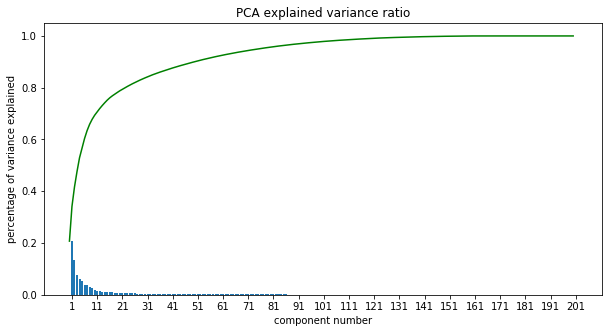

In [188]:
plt.figure(figsize=[10, 5])


pca_feature_count = np.arange(1, len(pca_ratio)+1, 1)

plt.bar(x = pca_feature_count, height = pca_ratio)

plt.plot(pca_ratio.cumsum(), color = 'green')

xticks = np.arange(1, len(pca_ratio)+1, 10)
xtick_labels = ['{:0.0f}'.format(v) for v in xticks]


plt.xticks(xticks, xtick_labels);
plt.xlabel('component number')
plt.ylabel('percentage of variance explained')

plt.title('PCA explained variance ratio');

In [189]:
#defining a function to output a graph of the PCA explained variance ration for a given number of features/components

def pca_graph(feature_number):
    
    pca = PCA(feature_number)
    
    df_pca = pca.fit_transform(azdias_final)
    pca_ratio = pca.explained_variance_ratio_
    
    print('Total cumulative variance explained by {} features is {:0.2f}'.format(feature_number, pca_ratio.sum()))
    
    pca_ratio_cumsum = pca_ratio.cumsum()
    
    #plotting the graph
    
    plt.figure(figsize=[10, 5])


    pca_feature_count = np.arange(1, len(pca_ratio)+1, 1)

    plt.bar(x = pca_feature_count, height = pca_ratio)

    plt.plot(pca_ratio.cumsum(), color = 'green')

    xticks = np.arange(1, len(pca_ratio)+1, 5)
    xtick_labels = ['{:0.0f}'.format(v) for v in xticks]


    plt.xticks(xticks, xtick_labels);
    plt.xlabel('component number')
    plt.ylabel('percentage of variance explained')

    plt.title('PCA explained variance ratio');

    
    return pca

In [190]:
# Re-apply PCA to the data while selecting for number of components to retain.

In [200]:
component_number = sum(pca_ratio.cumsum() < 0.91)
component_number

54

Total cumulative variance explained by 54 features is 0.91


PCA(copy=True, iterated_power='auto', n_components=54, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

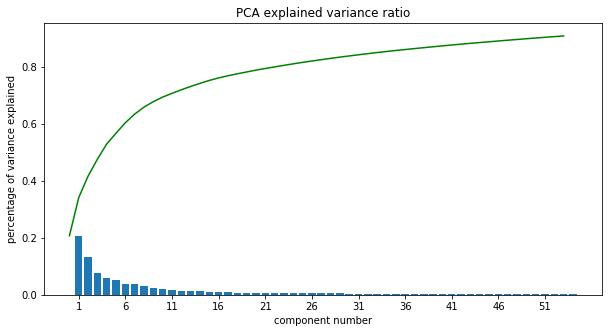

In [201]:
pca_graph(component_number)

In [261]:
pca = PCA(component_number)

pca_model = pca.fit(azdias_final)

azdias_pca = pca_model.transform(azdias_final)

### Discussion 2.2: Perform Dimensionality Reduction

We applied principal component analysis (PCA) on the dataset and found out that **90% variance is explained by 54 components**. 

We, therefore, are proceeding with **54 principal components** for our analysis.

The PCA was able to reduce the dimentionality of the dataset from *201* features to *54* features. Thats a dimentionality reduction of almost than *75%*

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [263]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

In [264]:
def component_weights(component_number):
    weight_list = []
    features = azdias_final.columns
    components = pca.components_[component_number]
    for i in range(len(components)):
        weight_list.append({'feature' : features[i],
                           'feature_weight' : components[i]})        
    
    component_weights = pd.DataFrame(weight_list, columns=['feature', 'feature_weight'])
    sorted_weights = component_weights.sort_values('feature_weight', ascending=False)
    
    return sorted_weights
    

In [265]:
component_weights(0).head(3)

,feature,feature_weight
32,ANZ_HAUSHALTE_AKTIV,0.237159
7,FINANZ_HAUSBAUER,0.094844
53,PLZ8_ANTG3,0.091427


- ANZ_HAUSHALTE_AKTIV : No. of households in the building
- FINANZ_HAUSBAUER : Financial Status (homeowner)
- PLZ8_ANTG3 : Number of 6-10 family houses in the specified region

In [266]:
component_weights(0).tail(3)

,feature,feature_weight
34,KONSUMNAEHE,-0.073752
51,PLZ8_ANTG1,-0.084044
35,MIN_GEBAEUDEJAHR,-0.907555


- KONSUMNAEHE : Distance from building to point of sale
- PLZ8_ANTG1 : Number of 1-2 family houses in the specified region
- MIN_GEBAEUDEJAHR : First year building was mentioned in the database

**PCA 1** 

This component is strongly related to the *details of the general area/region and its composition* of an individual. The strongest positive features of this component are ANZ_HAUSHALTE_AKTIV, FINANZ_HAUSBAUER, and PLZ8_ANTG3. These correspond to the no. of households in a person's building, their financial status (homeownership) and the number of 6-10 family houses in the specified region/area.

The strongest negative features of this component are KONSUMNAEHE, PLZ8_ANTG1, MIN_GEBAEUDEJAHR which correspond to the distance from an individual's residence to the PoS, the number of 1-2 family houses in the specified region and the first year the building was mentioned in the database.

This suggests that this feature is related to information about a person's *area/region and its composition*

In [267]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

component_weights(1).head(3)

,feature,feature_weight
32,ANZ_HAUSHALTE_AKTIV,0.545606
35,MIN_GEBAEUDEJAHR,0.374818
53,PLZ8_ANTG3,0.215645


- ANZ_HAUSHALTE_AKTIV : No. of households in the building
- MIN_GEBAEUDEJAHR : First year building was mentioned in the database
- PLZ8_ANTG3 : Number of 6-10 family houses in the specified region

In [268]:
component_weights(1).tail(3)

,feature,feature_weight
56,PLZ8_GBZ,-0.207991
51,PLZ8_ANTG1,-0.224019
31,WOHNDAUER_2008,-0.237989


- PLZ8_GBZ : Number of buildings within the specified region
- PLZ8_ANTG1 : Number of 1-2 family houses in the specified region
- WOHNDAUER_2008 : Length of residence

**PCA 2** 

This component goes is also strongly related to the *area/region composition* of an individual. The strongest positive features of this component are ANZ_HAUSHALTE_AKTIV, MIN_GEBAEUDEJAHR, and PLZ8_ANTG3. These correspond to a the number of households in an individuals building, the first year the building was mentioned in the database, and the number of 6-10 family houses in the specified region.

The strongest negative features of this component are PLZ8_GBZ, PLZ8_ANTG1, WOHNDAUER_2008 which correspond to the total number of buildings within the specified region, the number of 1-2 family houses in the region, and the length of residence of the indivual in their place of stay.

This suggests that this feature is also related to information about *the composition of an individual's area/region of stay*

In [269]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

component_weights(2).head(3)

,feature,feature_weight
31,WOHNDAUER_2008,0.655710
32,ANZ_HAUSHALTE_AKTIV,0.379108
0,ALTERSKATEGORIE_GROB,0.148065


- WOHNDAUER_2008 : Length of residence
- ANZ_HAUSHALTE_AKTIV : No. of households in the building
- ALTERSKATEGORIE_GROB : Estimated age

In [270]:
component_weights(2).tail(3)

,feature,feature_weight
23,SEMIO_PFLICHT,-0.161695
19,SEMIO_RAT,-0.181292
13,SEMIO_REL,-0.260225


- SEMIO_PFLICHT : Personality type (dutiful)
- SEMIO_RAT : Personality type (rational)
- SEMIO_REL : Personality type (religious)

**PCA 3** 

This component is strongly related to the *Age and length of residence*  of an individual. The strongest positive features of this component are WOHNDAUER_2008, ANZ_HAUSHALTE_AKTIV, and ALTERSKATEGORIE_GROB. These correspond to the length of residence of an individual at their place of stay, the no. of households in the building, and the estimated age of an individual based on their name.

The strongest negative features of this component are SEMIO_PFLICHT, SEMIO_RAT, SEMIO_REL which correspond to an individual's personality type.

This suggests that this feature is mostly related to information about a person's *personality*

### Discussion 2.3: Interpret Principal Components

**PCA 1 - area/region composition** 

This component is strongly related to the *details of the general area/region and its composition* of an individual. The strongest positive features of this component are ANZ_HAUSHALTE_AKTIV, FINANZ_HAUSBAUER, and PLZ8_ANTG3. These correspond to the no. of households in a person's building, their financial status (homeownership) and the number of 6-10 family houses in the specified region/area.

The strongest negative features of this component are KONSUMNAEHE, PLZ8_ANTG1, MIN_GEBAEUDEJAHR which correspond to the distance from an individual's residence to the PoS, the number of 1-2 family houses in the specified region and the first year the building was mentioned in the database.

This suggests that this feature is related to information about a person's *area/region and its composition*

**PCA 2 - area/region composition** 

This component goes is also strongly related to the *area/region composition* of an individual. The strongest positive features of this component are ANZ_HAUSHALTE_AKTIV, MIN_GEBAEUDEJAHR, and PLZ8_ANTG3. These correspond to a the number of households in an individuals building, the first year the building was mentioned in the database, and the number of 6-10 family houses in the specified region.

The strongest negative features of this component are PLZ8_GBZ, PLZ8_ANTG1, WOHNDAUER_2008 which correspond to the total number of buildings within the specified region, the number of 1-2 family houses in the region, and the length of residence of the indivual in their place of stay.

This suggests that this feature is also related to information about *the composition of an individual's area/region of stay*

**PCA 3 - individual's age and personality** 

This component is strongly related to the *Age and length of residence*  of an individual. The strongest positive features of this component are WOHNDAUER_2008, ANZ_HAUSHALTE_AKTIV, and ALTERSKATEGORIE_GROB. These correspond to the length of residence of an individual at their place of stay, the no. of households in the building, and the estimated age of an individual based on their name.

The strongest negative features of this component are SEMIO_PFLICHT, SEMIO_RAT, SEMIO_REL which correspond to an individual's personality type.

This suggests that this feature is mostly related to information about a person's *personality*

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [271]:
#initalizing the KMeans clustering (MiniBatchKMeans)

from sklearn.cluster import MiniBatchKMeans

In [272]:
# Over a number of different cluster counts...
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.    

In [273]:
#calculating the SSE and score for diffent values of k over a range of 5 to 31

k_range = range(5,31)
scores = []
sse = []

for k in k_range:
    MB_KM = MiniBatchKMeans(n_clusters=k)
    MB_KM.fit(azdias_pca)
    score_val = MB_KM.score(azdias_pca)
    sse_val = MB_KM.inertia_
    scores.append(1/abs(score_val))
    sse.append(sse_val)
    print(k)  #printing values of k to observe progress of this cell


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [274]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

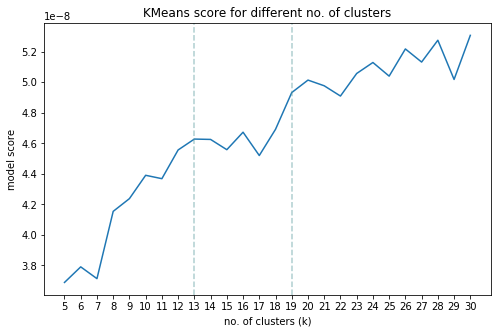

In [282]:
#plotting the score for every k

plt.figure(figsize=[8,5])

plt.plot(k_range, scores)

xticks = np.arange(5, 31, 1)
xtick_labels = ['{:.0f}'.format(v) for v in xticks]

plt.axvline(x = 13, linestyle = '--', alpha = 0.5, color = 'cadetblue')
plt.axvline(x = 19, linestyle = '--', alpha = 0.5, color = 'cadetblue')

plt.xticks(xticks, xtick_labels)

plt.xlabel('no. of clusters (k)')
plt.ylabel('model score')
plt.title('KMeans score for different no. of clusters');

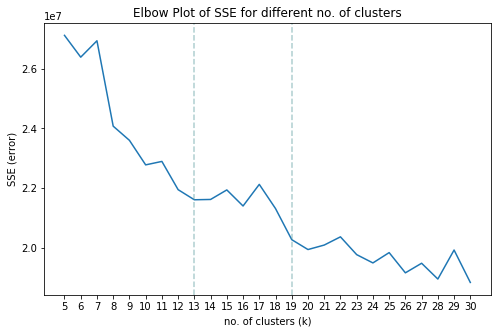

In [281]:
#plotting the elbow plot for SSE vs no. of clusters

plt.figure(figsize=[8,5])

plt.plot(k_range, sse)

xticks = np.arange(5, 31, 1)
xtick_labels = ['{:.0f}'.format(v) for v in xticks]

plt.axvline(x = 13, linestyle = '--', alpha = 0.5, color = 'cadetblue')
plt.axvline(x = 19, linestyle = '--', alpha = 0.5, color = 'cadetblue')

plt.xticks(xticks, xtick_labels)

plt.xlabel('no. of clusters (k)')
plt.ylabel('SSE (error)')
plt.title('Elbow Plot of SSE for different no. of clusters');

A slight **elbow** is observed at **k = 14** and also at **k=19**

The elbow at *k=19* seems a better choice as the SSE don't really increase much for larger ks. We are, therefore, going to proceed with fitting the KMeans with **k = 19**

In [283]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

MB_KM = MiniBatchKMeans(n_clusters=19)
MB_KM_model = MB_KM.fit(azdias_pca)
azdias_clusters = MB_KM_model.predict(azdias_pca)

### Discussion 3.1: Apply Clustering to General Population

A KMeans clustering was performed on the Principal Components of the whole population. The clustering was performed for different values of k in range from 5 to 24. The scores and SSE of the clustering model for each *k* were plotted to identify an *elbow* in the graph which would help us identify the optimum number of clusters. 

A *slight elbow* was noticed on **k=15**. It was, therefore, decided to create a KMeans model using *15 clusters*

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [284]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [285]:
#applying the clean_data function on the customers dataset

customers_clean, customer_high_nan = clean_data(customers)


/Users/muj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/muj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Reminder: There might be NaN values present in the DataFrame


- **customers_clean** df has all the records having *low* volume of missing data
- **customer_high_nan** df has all the records having *high* volume of missing data 

In [286]:
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,CAMEO_DEU_2015_nan,DECADE,MOVEMENT,LIFE_STAGE,WEALTH
0,4.0,1,5,1,5,1,2,2,1,1.0,...,0,0,0,0,0,0,50.0,0.0,3.0,1.0
2,4.0,2,5,1,5,1,4,4,1,2.0,...,0,0,0,0,0,0,40.0,1.0,4.0,3.0
3,4.0,1,5,1,5,2,1,2,0,2.0,...,0,0,0,0,0,0,70.0,1.0,4.0,2.0
4,3.0,1,3,1,4,4,5,2,0,3.0,...,0,0,0,0,0,0,50.0,0.0,1.0,4.0
5,3.0,1,5,1,5,1,2,3,1,3.0,...,0,0,0,0,0,0,50.0,0.0,4.0,3.0


In [287]:
#applying the imputer model to remove all the missing data (NaNs) from the dataset

customers_clean = pd.DataFrame(imputer_model.transform(customers_clean), columns=customers_clean.columns)

In [288]:
customers_clean.isna().sum().sum()

0

The **customer_clean** dataset is ready for use

We will run a quick check to see if the shapes of both *customer dataset* and the *population dataset* are compatible. The number of features/columns of both the datasets have to be equal for the clustering model to run

In [289]:
customers_clean.shape

(141590, 201)

In [290]:
azdias_final.shape

(797077, 201)

In [291]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.


#preprocessin (scaling) customer data use the population scaler model
customers_scaled = scaler_model.transform(customers_clean)


In [292]:
#Applying Feature Transformation (PCA) on customer data use the population PCA model

customer_pca = pca_model.transform(customers_scaled)

In [293]:
#clustering customer data into k=15 segments using the population KMeans model

customer_cluster = MB_KM_model.predict(customer_pca)

The *population KMeans model* has now been applied on the customer dataset

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [294]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

In [295]:
#calculating the cluster_proportions for azidas dataset and the customer dataset

unique1, az_cluster_count = np.unique(azdias_clusters, return_counts=True) 
unique2, cust_cluster_count = np.unique(customer_cluster, return_counts=True) 

In [296]:
az_cluster_prop = az_cluster_count/azidas_clean.shape[0]
cust_cluster_prop = cust_cluster_count/customers.shape[0]

In [297]:
df_az = pd.DataFrame()
df_cust = pd.DataFrame()

__*Note*__: The propotion of datapoints were calcluated with respect to the complete population and customer dataset (not just the dataset having low volumns of missing data). The reason for this is that we will be making a seperate cluster (-1) for records having high volume of missing data

In [298]:
#creting a df for cluster and proprtion of records

df_az['cluster'] = unique1
df_az['proportion'] = az_cluster_prop
df_az['dataset'] = 'general population'

In [299]:
df_cust['cluster'] = unique2
df_cust['proportion'] = cust_cluster_prop
df_cust['dataset'] = 'mail-in company'

In [300]:
#combining df_az and df_cust into a single combined df

df_combined = pd.concat([df_az, df_cust], ignore_index=True)

In [301]:
#proportion of population having high valumne of missing data
az_high_nan = azdias_high_nan.shape[0]/azidas_clean.shape[0]
az_high_nan

0.10563485375681228

In [302]:
#proportion of customers having high valumne of missing data
cust_high_nan = customer_high_nan.shape[0]/customers_clean.shape[0]
cust_high_nan

0.3535701673847023

The records having high volume of missing data will be clubbed in a separate cluster **(-1)** 

In [303]:
#creating a df for the high_nan records

new_cluster = [{'cluster': -1,
                'proportion' : az_high_nan,
                'dataset' : 'general population'},
                {'cluster': -1,
                'proportion' : cust_high_nan,
                'dataset' : 'mail-in company'}]

In [304]:
df_high_nan = pd.DataFrame(new_cluster, columns=['cluster', 'proportion', 'dataset'])
df_high_nan

,cluster,proportion,dataset
0,-1,0.105635,general population
1,-1,0.353570,mail-in company


In [305]:
#joining/concatinating the df_high_nan with df_combined

df_combined = pd.concat([df_combined, df_high_nan], ignore_index=True)

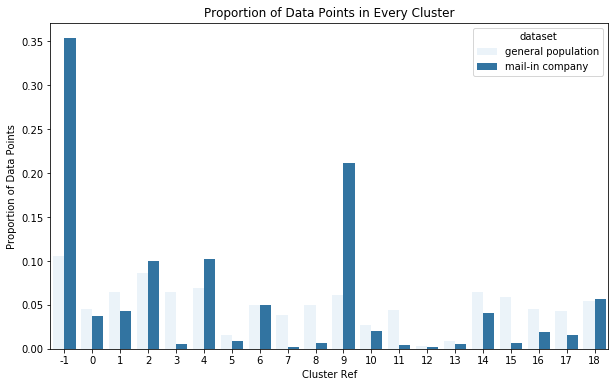

In [306]:
#plotting the cluster segment proportions proportions 

plt.figure(figsize=[10,6])

sns.barplot(data = df_combined, x = 'cluster', y = 'proportion', hue = 'dataset', color = sns.color_palette()[0])

plt.xlabel('Cluster Ref')
plt.ylabel('Proportion of Data Points')
plt.title('Proportion of Data Points in Every Cluster');

In [219]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

Cluster *2, 4, 9, and 18* are over represented in the customer data compared to the general population.

Cluster **9** in particular is greately *over represented* in the customer datat as compared to the general population data. We are going to study the general characteristics of an avg person belonging to *cluster 11* as that seems to be one of the top profiles of our target market

In [326]:
#creating a function which takes in the cluster number and returns a df of feature values

def avg_profile(cluster_number):
    #applying inverse_transform on cluster to get back the actual values of the avg profile
    
    pca_vals = MB_KM_model.cluster_centers_[cluster_number]
    scaled_features = pca_model.inverse_transform(pca_vals)
    actual_features = scaler_model.inverse_transform(scaled_features.reshape(1, -1))
    
    profile = actual_features[0]
    
    #adding the feature names to the feature values and creating a dataframe of the profile
    
    profile_df = pd.DataFrame()

    profile_df['feature_name'] = azdias_final.columns
    profile_df['feature_val'] = profile


    return profile_df

We are going to analyse the characteristics of the clusters based on the following "descriptive features"

In [330]:
descriptive_features = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'W_KEIT_KIND_HH', 'OST_WEST_KZ', 'KONSUMNAEHE',
                        'ANZ_HAUSHALTE_AKTIV', 'WEALTH']

Finding out the average characteristics of an individual in the **target market**

In [331]:
target_profile = avg_profile(9)

In [332]:
target_profile.query('feature_name in @descriptive_features')

,feature_name,feature_val
0,ALTERSKATEGORIE_GROB,3.311190
1,ANREDE_KZ,1.105190
30,W_KEIT_KIND_HH,4.439678
32,ANZ_HAUSHALTE_AKTIV,2.324358
34,KONSUMNAEHE,3.093319
36,OST_WEST_KZ,0.896109
200,WEALTH,2.330988


**Some traits of the Target Profile**
1. ALTERSKATEGORIE_GROB - Age : **46 - 60 years old**
2. ANREDE_KZ - Gender : **Male**
3. W_KEIT_KIND_HH - Liklihood of Children in household : **average**
4. OST_WEST_KZ - Building location (East (0) of West (1) Germany) : **West Germany**
5. KONSUMNAEHE - Distance from PoS : **building is located in a 500 x 500m grid cell that includes at least consumption cell**
6. ANZ_HAUSHALTE_AKTIV - No. of households in the building : **more than 2**
7. WEALTH - Financial Status (of neighbourhood) : **Prosperous Households**

In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

While there are a number of clusters which are *under representative** clusters e.g. *3, 5, 7, 8, 11, 12, 13 etc*.

Cluster **3** in particular is greately *under represented* in the customer data as compared to the general population. We will investigate the characteristic of an average member of cluster 3 to identify the characteristics of people *not included in our target market*



In [333]:
non_traget_profile = avg_profile(3)

In [334]:
non_traget_profile.query('feature_name in @descriptive_features')

,feature_name,feature_val
0,ALTERSKATEGORIE_GROB,1.719038
1,ANREDE_KZ,1.676493
30,W_KEIT_KIND_HH,4.135234
32,ANZ_HAUSHALTE_AKTIV,10.888677
34,KONSUMNAEHE,2.001096
36,OST_WEST_KZ,0.695494
200,WEALTH,4.462556


**Some traits of the people NOT in the Target Market**
1. ALTERSKATEGORIE_GROB - Age : **30 - 45 years old**
2. ANREDE_KZ - Gender : **Female**
3. W_KEIT_KIND_HH - Liklihood of Children in household : **average**
4. OST_WEST_KZ - Building location (East (0) of West (1) Germany) : **West Germany**
5. KONSUMNAEHE - Distance from PoS : **building is located in a 250 x 250m grid cell that includes at least consumption cell**
6. ANZ_HAUSHALTE_AKTIV - No. of households in the building : **more than 10**
7. WEALTH - Financial Status (of neighbourhood) : **Less Affluent Households**

### Discussion 3.3: Compare Customer Data to Demographics Data

**Some traits of the Target Profile**
1. ALTERSKATEGORIE_GROB - Age : **46 - 60 years old**
2. ANREDE_KZ - Gender : **Male**
3. W_KEIT_KIND_HH - Liklihood of Children in household : **average**
4. OST_WEST_KZ - Building location (East (0) of West (1) Germany) : **West Germany**
5. KONSUMNAEHE - Distance from PoS : **building is located in a 500 x 500m grid cell that includes at least consumption cell**
6. ANZ_HAUSHALTE_AKTIV - No. of households in the building : **more than 2**
7. WEALTH - Financial Status (of neighbourhood) : **Prosperous Households**


**Some traits of the people NOT in the Target Market**
1. ALTERSKATEGORIE_GROB - Age : **30 - 45 years old**
2. ANREDE_KZ - Gender : **Female**
3. W_KEIT_KIND_HH - Liklihood of Children in household : **average**
4. OST_WEST_KZ - Building location (East (0) of West (1) Germany) : **West Germany**
5. KONSUMNAEHE - Distance from PoS : **building is located in a 250 x 250m grid cell that includes at least consumption cell**
6. ANZ_HAUSHALTE_AKTIV - No. of households in the building : **more than 10**
7. WEALTH - Financial Status (of neighbourhood) : **Less Affluent Households**

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.